In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,BatchNormalization,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split

directory = r"dataset"

# os.listdir will make a list containing all the folders present in the mentioned directory
categories = os.listdir(directory) 
tags = (0,1)

# Creating a dictionary to assign numerical values to our folders
labeldict = dict(zip(categories,tags))

print(categories)
print(labeldict)

['without_mask', 'with_mask']
{'without_mask': 0, 'with_mask': 1}


In [2]:
imgsize = (224,224)
dataset = []
label = [] 

for category in categories: 

    # Joining the subfolders with the directory and reading the images from the subfolders
    folder = os.path.join(directory, category)     
    print(folder)
    images = os.listdir(folder)

    try:
        for img in images:
            imagepath = os.path.join(folder,img)
            image = cv.imread(imagepath)
            resizedimg = cv.resize(image,imgsize)

            # Storing the images as arrays 
            label.append(labeldict[category])
            dataset.append(resizedimg)

    except:
        print("Exception")
        
# Converting lists into arrays for deep learning model:
dataset = np.array(dataset)/255.0
label = np.array(label)
label = to_categorical(label)


dataset\without_mask
dataset\with_mask
Exception


In [3]:
# Checking if our dataset is loaded correctly
cv.imshow("test",dataset[0])
cv.waitKey(0)

27

In [4]:
# Splitting dataset and label into training and testing data
(trainX, testX, trainY, testY) = train_test_split(dataset, label, test_size=0.20, stratify = label)

In [10]:
# Defining the model and adding multiple CNN layers:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compiling our model:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
# WARNING: This cell will take about 1 hour 30 minutes to run
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose=0, mode = 'auto')
history= model.fit(trainX,trainY,epochs=20,callbacks = [checkpoint],validation_split=0.2)

Epoch 1/20
52/52 [==============================] - 337s 6s/step - loss: 0.9515 - accuracy: 0.7574 - val_loss: 0.2447 - val_accuracy: 0.9080
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
52/52 [==============================] - 310s 6s/step - loss: 0.2091 - accuracy: 0.9238 - val_loss: 0.1040 - val_accuracy: 0.9709
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
52/52 [==============================] - 309s 6s/step - loss: 0.1232 - accuracy: 0.9685 - val_loss: 0.0854 - val_accuracy: 0.9709
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
52/52 [==============================] - 311s 6s/step - loss: 0.0851 - accuracy: 0.9792 - val_loss: 0.0710 - val_accuracy: 0.9831
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
52/52 [==============================] - 309s 6s/step - loss: 0.0798 - accuracy: 0.9713 - val_loss: 0.0964 - val_accuracy: 0.9637
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch

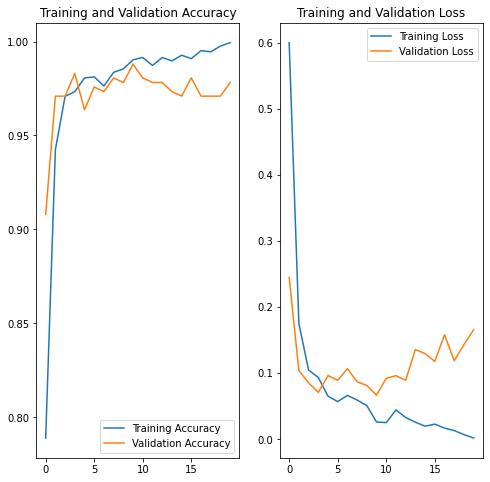

In [7]:
# Plotting the accuracy and loss of our model:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
